# MiniProject - Exploring World Indicators

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
import re
pd.set_option('display.max_rows', 40)


In [3]:
global country_df, indicators_df

country_df = pd.read_csv('world-development-indicators/Country.csv')
indicators_df = pd.read_csv('world-development-indicators/Indicators.csv')

## Basic exploration

### Information in Countries.csv (stored in countries_df)

In [4]:
## Basic exploration
countries = country_df['ShortName'].unique()
num_countries = len(countries)
print('Found %d countries:\n%s' % (num_countries, countries))


Found 247 countries:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' "Dem. People's Rep. Korea"
 'Dem. Rep. Congo' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'East Asia & Pacific (all income levels)'
 'East Asia & Pacific (developing only)' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Euro area'
 'Europe & Central Asia (all inc

In [5]:
## Basic exploration
keys_c = country_df.columns
num_keys_c = len(keys_c)
print('Found %d keys in countries.csv:\n%s\n\n' % (num_keys_c, keys_c))


Found 31 keys in countries.csv:
Index(['CountryCode', 'ShortName', 'TableName', 'LongName', 'Alpha2Code',
       'CurrencyUnit', 'SpecialNotes', 'Region', 'IncomeGroup', 'Wb2Code',
       'NationalAccountsBaseYear', 'NationalAccountsReferenceYear',
       'SnaPriceValuation', 'LendingCategory', 'OtherGroups',
       'SystemOfNationalAccounts', 'AlternativeConversionFactor',
       'PppSurveyYear', 'BalanceOfPaymentsManualInUse',
       'ExternalDebtReportingStatus', 'SystemOfTrade',
       'GovernmentAccountingConcept', 'ImfDataDisseminationStandard',
       'LatestPopulationCensus', 'LatestHouseholdSurvey',
       'SourceOfMostRecentIncomeAndExpenditureData',
       'VitalRegistrationComplete', 'LatestAgriculturalCensus',
       'LatestIndustrialData', 'LatestTradeData', 'LatestWaterWithdrawalData'],
      dtype='object')




### Information in Indicators.csv (stored in indicators_df)

In [6]:
indicators = indicators_df['IndicatorName'].unique()
num_indicators = len(indicators)

years = indicators_df['Year'].unique()
num_years = len(years)

countries_ind = indicators_df['CountryName'].unique()
num_countries_ind = len(countries_ind)

print('Data for %d years:\n%s\n\n' %(num_years, years))
print('Data for %d countries:\n%s\n\n' %(num_countries_ind, countries_ind))

print('Found %d unique indicators across %d countries and %d years' % (num_indicators, num_countries_ind, num_years))
display("Here are the indicators", indicators)


Data for 56 years:
[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


Data for 247 countries:
['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'East Asia & Pacific (all income levels)'
 'East Asia & Pacific (developing only)' 'Euro area'
 'Europe & Central Asia (all income levels)'
 'Europe & Central Asia (developing only)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income'
 'High income: nonOECD' 'High income: OECD'
 'Latin America & Caribbean (all income levels)'
 'Latin America & Caribbean (developing only)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income'
 'Middle East & North Africa (all income levels)'
 

'Here are the indicators'

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)', ...,
       'Fish species, threatened', 'Mammal species, threatened',
       'Plant species (higher), threatened'], dtype=object)

In [7]:
#Function to get the country code of a country
def get_country_code(country_name):
    country_pattern = '.*' + country_name + '.*'
    b = country_df['LongName'].str.contains(country_pattern, case = False, regex = True)
    
    if b.any():
        country_info = country_df[b]
        #return country_info['CountryCode'].values[0]
        return country_info['CountryCode'].values
    else:
        b = country_df['TableName'].str.contains(country_pattern, case = False, regex = True)
        if b.any():
            country_info = country_df[b]
            #return country_info['CountryCode'].values[0]
            return country_info['CountryCode'].values
        else:
            return np.array([])

#Test function
get_country_code('mexico')

array(['MEX'], dtype=object)

In [8]:
#Function to get the list of indicators containing a certain pattern associated with a given country
def get_indicators(indicator_pattern, country_code):
   
    all_indicators_of_given_country = \
        pd.Series(indicators_df[indicators_df['CountryCode'] == country_code]['IndicatorName'].unique())

    indicator_pattern = '.*' + indicator_pattern + '.+'
    b = all_indicators_of_given_country.str.contains(indicator_pattern, case = False, regex = True)
    
    if b.any():
        return all_indicators_of_given_country[b]
    else:
        return np.array([])

#Test function
get_indicators('poverty', 'MEX')

666             Poverty gap at $1.90 a day (2011 PPP) (%)
667             Poverty gap at $3.10 a day (2011 PPP) (%)
668     Poverty headcount ratio at $1.90 a day (2011 P...
669     Poverty headcount ratio at $3.10 a day (2011 P...
1255    Poverty headcount ratio at national poverty li...
1259    Rural poverty headcount ratio at national pove...
1260    Urban poverty headcount ratio at national pove...
dtype: object

### Let the exploration begin
Enter a string pattern representing an indicator and a string pattern representing the country.

E.g. indicator string pattern =  fertility , country string pattern = india


In [9]:
count = 1

indicator = input('Enter a string representing the indicator you want to explore:  ')
country_name = input('Which country\'s indicators (enter a string):  ')

#Can we find a country with the given string representing a country?
country_code = get_country_code(country_name)
if len(country_code) == 0:
    print('** Did not find any country with containing the string \"%s"' % country_name)
else:
    if len(country_code) > 1:
        print('Multiple countries found:')
        for code in country_code:
            print(code)
        country_code = input('Please type the country code you want: ')
    else:
        print(country_code)
        country_code = country_code[0]

    indicators_list = get_indicators(indicator, country_code)

    if len(indicators_list) > 0:
        print('\n\nFound %d indicators containing the string \"%s\" for %s:' \
              % (len(indicators_list), indicator,country_name))

        for ind in indicators_list:
            print('\t%d\t%s' % (count,ind))
            count += 1

    else:
        print('\n\nNo indicators were found for the given country and indicator')

Enter a string representing the indicator you want to explore:  poverty
Which country's indicators (enter a string):  india
['IND']


Found 10 indicators containing the string "poverty" for india:
	1	Poverty gap at $1.90 a day (2011 PPP) (%)
	2	Poverty gap at $3.10 a day (2011 PPP) (%)
	3	Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)
	4	Poverty headcount ratio at $3.10 a day (2011 PPP) (% of population)
	5	Poverty headcount ratio at national poverty lines (% of population)
	6	Rural poverty headcount ratio at national poverty lines (% of rural population)
	7	Urban poverty headcount ratio at national poverty lines (% of urban population)
	8	Poverty gap at national poverty lines (%)
	9	Rural poverty gap at national poverty lines (%)
	10	Urban poverty gap at national poverty lines (%)


In [10]:
#Getting countries by GDP per capita
yrs = range(1960,2015,1)
countries = ['United States', 'United Kingdom', 'France', 'Germany', 'Australia', 'Japan', 
             'Brazil', 'India', 'China', 'Nigeria', 'South Africa', 'Malaysia']
countries = countries_ind
inds = ['GDP per capita (current US$)']

df = indicators_df[ (indicators_df['IndicatorName'].isin(inds)) & \
                   (indicators_df['Year'].isin(yrs)) & \
                   (indicators_df['CountryName'].isin(countries))].sort_values(by='Year')
df = df[['Year', 'CountryName', 'IndicatorName', 'Value']]

gdp_all = pd.DataFrame({'Country' : countries})
max_gdp = []

for c in countries:
    max_gdp.append(df[df['CountryName'] == c]['Value'].max())

gdp_all['Max. GDP per Capita'] = max_gdp

gdp_all = gdp_all.dropna()
gdp_all = gdp_all.sort_values(by='Max. GDP per Capita')


In [11]:
#Going to focus on Birth rate and fertility rate and see how they are correlated among the
#countries with the lowest and highest GDP per capita 

valid_years = range(1990,2014)

developed_countries = ['United States', 'United Kingdom', 'France', 'Germany', 'Australia', 'Japan']
developing_countries = ['Brazil', 'India', 'China', 'Nigeria', 'South Africa', 'Malaysia']

indicators_gdp = ['GDP per capita (current US$)', 'Trade (% of GDP)', 'Gross savings (% of GDP)']
indicators_birth = ['Birth rate, crude (per 1,000 people)', 'Fertility rate, total (births per woman)']

#Function to give the data for a given set of indicators, countries and years
def get_indicator_data(list_of_indicators, list_of_countries, list_of_years):
    return indicators_df[\
                        (indicators_df['IndicatorName'].isin(list_of_indicators)) & \
                         (indicators_df['CountryName'].isin(list_of_countries)) & \
                        (indicators_df['Year'].isin(list_of_years))][['CountryName', 'IndicatorName', 'Year', 'Value']]


#Get required indicator values about the countries for specific years
def get_stats(indicators_list, countries_list, years_list):
    countries_stats = {}
    df_all = get_indicator_data(indicators_list, countries_list, years_list)
    for country in countries_list:
        df1 = pd.DataFrame(index = valid_years, columns = indicators_list)
        for ind in indicators_list:
            df1[ind] = df_all[(df_all['IndicatorName'] == ind) & \
                                  (df_all['CountryName'] == country) & \
                                 (df_all['Year'].isin(valid_years))].sort_values(by='Year')['Value'].values
        countries_stats[country] = df1
    return countries_stats

#Get correlation value between 'Birth rate, crude (per 1,000 people)'
#and 'Fertility rate, total (births per woman)'
birth_fertility_data = get_stats(indicators_birth, developing_countries+developed_countries, valid_years)
e = []
for c in developing_countries+developed_countries:
    corr1 = birth_fertility_data[c].corr()
    e.append([c,corr1.loc[corr1.columns[1]].values[0]])

country_corr = pd.DataFrame(e, columns = ['Country', 'Corr'])
country_corr.sort_values(by='Corr')

,Country,Corr
8,France,-0.258092
9,Germany,-0.102722
10,Australia,0.507955
11,Japan,0.556251
7,United Kingdom,0.575226
6,United States,0.646321
2,China,0.796368
3,Nigeria,0.957638
0,Brazil,0.996429
5,Malaysia,0.998482


In [12]:
birth_fertility_data['Japan'][[indicators_birth[0], indicators_birth[1]]]

,"Birth rate, crude (per 1,000 people)","Fertility rate, total (births per woman)"
1990,10.000000,1.540
1991,9.900000,1.530
1992,9.800000,1.502
1993,9.600000,1.458
1994,10.000000,1.500
1995,9.540000,1.422
1996,9.600000,1.425
1997,9.500000,1.388
1998,9.600000,1.384
1999,9.300000,1.342


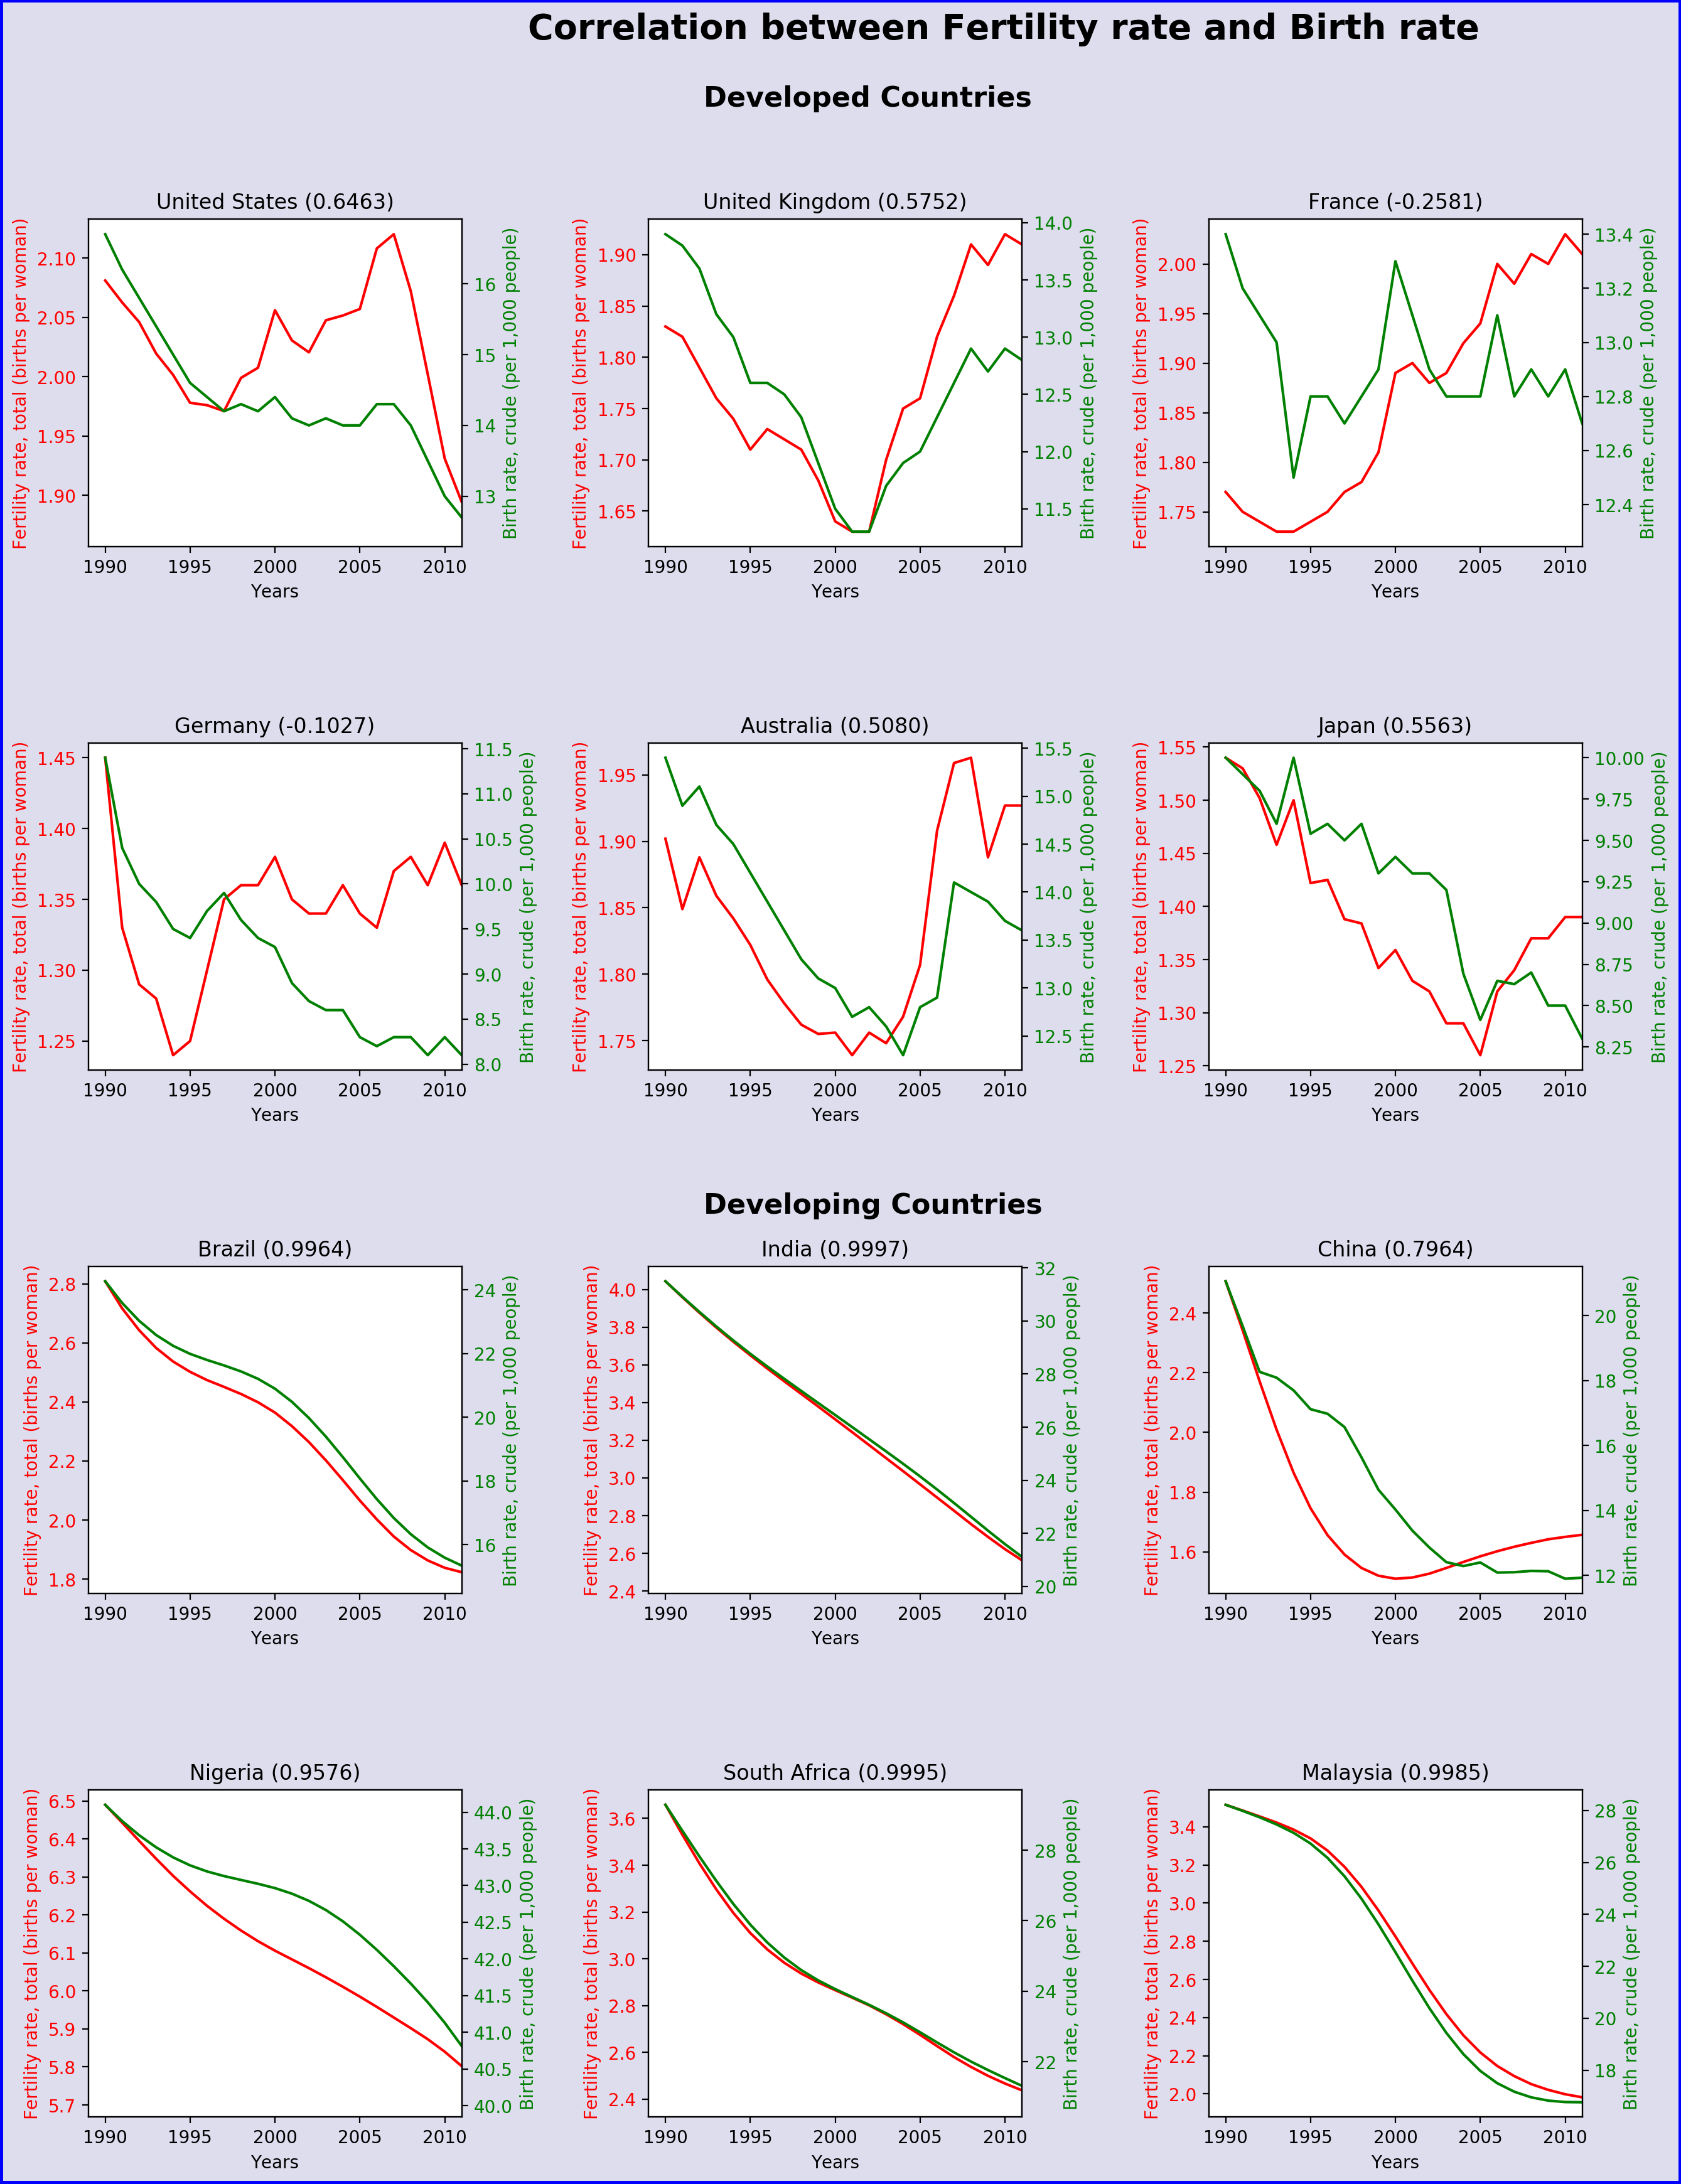

In [43]:
#Initial setup
fig = plt.figure(figsize=(14,18), dpi = 200, edgecolor = 'blue', linewidth = 3, facecolor = '#ddddee')
fig.tight_layout()

plt.figtext(0.35,1, 'Correlation between Fertility rate and Birth rate', fontsize = 20, fontweight = 'bold')
plt.figtext(0.45,0.97, "Developed Countries", fontsize = 16, fontweight = 'bold')
plt.figtext(0.45,0.48, "Developing Countries", fontsize = 16, fontweight = 'bold')

y1_color = 'red'
y2_color = 'green'

xvalues_common = birth_fertility_data['India'].index
axs_index = 1

for country in developed_countries+ developing_countries:    
    
    #Draw the figure, drop in the correlation value
    corr = birth_fertility_data[country].corr()
    corr = corr.loc[corr.columns[1]].values[0]
    
    #Set the X-axis
    ax = fig.add_subplot(4, 3, axs_index)
    ax.set_title('%s (%-0.4f)' % (country, corr))
    ax.set_xlabel('Years')
    ax.set_xlim((1989,2011))

    #Set the first Y-axis
    y1_values = birth_fertility_data[country][[indicators_birth[1]]].values
    ax.set_ylabel(indicators_birth[1], color = y1_color)
    ax.tick_params(axis='y', labelcolor=y1_color)
    ax.plot(xvalues_common, y1_values,  color = y1_color)

    #Set the second Y-axis
    y2_values = birth_fertility_data[country][[indicators_birth[0]]].values
    ay = ax.twinx()

    ay.set_ylabel(indicators_birth[0], color = y2_color)
    ay.tick_params(axis='y', labelcolor=y2_color)
    ay.plot(xvalues_common, y2_values, color = y2_color)

    axs_index += 1
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6, wspace=0.5)
plt.show()